In [2]:
from time import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", header = None)

df_raw.columns = ["label", "time", "date", "query", "username", "text"]

df_raw.head(10)

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
df_raw['label'].value_counts()

0    800000
4    800000
Name: label, dtype: int64

In [5]:
df = df_raw[['label', 'text']]
df.head(3)

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...


In [6]:
df_pos = df[df['label'] == 4]
df_neg = df[df['label'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [7]:
df_pos = df_pos.iloc[:int(len(df_pos) / 4)]
df_neg = df_neg.iloc[:int(len(df_neg) / 4)]
print(len(df_pos), len(df_neg))

200000 200000


In [8]:
df = pd.concat([df_pos, df_neg])
len(df)

400000

In [9]:
start_time = time()

from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer(reduce_len = True)

data = []

X = df['text'].tolist()
Y = df['label'].tolist()

for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))

print('Time taken:', time() - start_time)
data[:3]

Time taken: 35.443665504455566


[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1)]

In [10]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

print(pos_tag(data[0][0]))

[('I', 'PRP'), ('LOVE', 'VBP'), ('@Health4UandPets', 'NNS'), ('u', 'JJ'), ('guys', 'NNS'), ('r', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('!', '.'), ('!', '.')]


In [11]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(data[100][0]))

['I', 'be', 'determine', 'to', 'get', 'back', 'into', 'baseball', '-', '-', "it's", 'be', '5', 'year', 'since', "I've", 'really', 'watch', 'the', 'sport', '.', 'Anyone', 'interested', 'in', 'go', 'to', 'a', 'game', '?']


In [12]:
import re, string

from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

def remove_noise(tweet_tokens):
    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())

        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
    
    return cleaned_tokens

print(remove_noise(data[6996][0]))

['many', 'people', 'wanna', 'rip', 'really']


In [13]:
start_time = time()

def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Remove noise, time taken:', time() - start_time)

start_time = time()

final_data = []

for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))

print('Final data, time taken:', time() - start_time)

final_data[:3]

Remove noise, time taken: 496.09156370162964
Final data, time taken: 1.9898016452789307


[({'love': True, 'guy': True, 'best': True}, 1),
 ({'meet': True,
   'one': True,
   'besties': True,
   'tonight': True,
   'cant': True,
   'wait': True,
   'girl': True,
   'talk': True},
  1),
 ({'thanks': True,
   'twitter': True,
   'add': True,
   'sunisa': True,
   'get': True,
   'meet': True,
   'hin': True,
   'show': True,
   'area': True,
   'sweetheart': True},
  1)]

In [14]:
random.Random(140).shuffle(final_data)

trim_index = int(len(final_data) * 0.8)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [15]:
from nltk import classify
from nltk import  NaiveBayesClassifier

start_time = time()

classifier = NaiveBayesClassifier.train(train_data)

print('Train accuracy:', classify.accuracy(classifier, train_data))
print('Test accuracy:', classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

print('Time taken:', time() - start_time)

Train accuracy: 0.813075
Test accuracy: 0.7515875
Most Informative Features
               depressed = True                0 : 1      =     45.4 : 1.0
               toothache = True                0 : 1      =     39.7 : 1.0
                    roni = True                0 : 1      =     31.0 : 1.0
                 unhappy = True                0 : 1      =     28.2 : 1.0
                illusion = True                1 : 0      =     25.7 : 1.0
                  asthma = True                0 : 1      =     25.0 : 1.0
                nauseous = True                0 : 1      =     25.0 : 1.0
                 unloved = True                0 : 1      =     23.7 : 1.0
              depressing = True                0 : 1      =     20.2 : 1.0
                     bom = True                1 : 0      =     20.2 : 1.0
None
Time taken: 20.082457065582275


In [24]:
custom_tweet = "love"
custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [17]:
from sklearn import metrics

y = [test_data[i][1] for i in range(len(test_data))]

probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

print(len(y), len(probs))

fpr, tpr, threholds = metrics.roc_curve(y, probs)

auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

80000 80000
AUC: 0.830


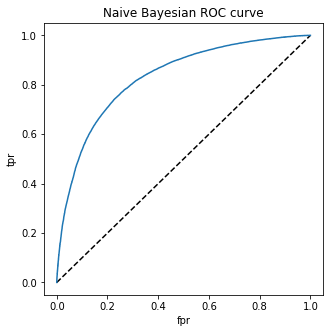

In [18]:
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [20]:
probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]

y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,32722,7317,40039
1,12556,27405,39961
All,45278,34722,80000
